In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
crash = pd.read_csv('https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/Crashes_in_DC_cleaned.csv')
weather = pd.read_csv('https://raw.githubusercontent.com/ranjanj1/Traffic-Accident-Analysis-in-Washington-DC/main/Weather_Cleaned_Data(2015-2019).csv')

In [3]:
#looking at shape data to see how many rows and columns i should expect
#in the new data set. 128758 rows and 22 columns
crash_shape = crash.shape
weather_shape = weather.shape

print('the crash data has', crash_shape,'rows and columns')
print('the weather data has',weather_shape,'rows and columns')

the crash data has (106422, 6) rows and columns
the weather data has (1831, 16) rows and columns


In [4]:
#Removes timezone and strips the time of dat from the crash REPORTDATE
#column to prepared for the merge
crash['REPORTDATE'] = pd.to_datetime(crash['REPORTDATE'])
crash['REPORTDATE'] = crash['REPORTDATE'].dt.tz_convert(None)
crash['REPORTDATE'] = crash['REPORTDATE'].dt.strftime('%Y-%m-%d')
crash['REPORTDATE'] = pd.to_datetime(crash['REPORTDATE'])

#need to convert date time column in the weather DF so it can merge
weather['Date time'] = pd.to_datetime(weather['Date time'])

In [5]:
#merging the files on the date
merged = pd.merge(crash, weather, how = 'inner', 
                  left_on = crash['REPORTDATE'],
                  right_on = weather['Date time'])
print(merged.shape)
print(merged.columns)
print(merged.dtypes)

(106735, 23)
Index(['key_0', 'REPORTDATE', 'CrashCount', 'Hour', 'Day', 'Month', 'Year',
       'Date time', 'Maximum Temperature', 'Minimum Temperature',
       'Temperature', 'Wind Chill', 'Heat Index', 'Precipitation', 'Snow',
       'Snow Depth', 'Wind Speed', 'Wind Direction', 'Wind Gust', 'Visibility',
       'Cloud Cover', 'Relative Humidity', 'Conditions'],
      dtype='object')
key_0                  datetime64[ns]
REPORTDATE             datetime64[ns]
CrashCount                      int64
Hour                            int64
Day                             int64
Month                           int64
Year                            int64
Date time              datetime64[ns]
Maximum Temperature           float64
Minimum Temperature           float64
Temperature                   float64
Wind Chill                    float64
Heat Index                    float64
Precipitation                 float64
Snow                          float64
Snow Depth                    float64
Wi

In [6]:
merged.drop(['REPORTDATE','Maximum Temperature','Date time', 'Minimum Temperature', 'Temperature',
       'Wind Chill', 'Heat Index', 'Snow Depth',
       'Wind Speed', 'Wind Direction', 'Wind Gust', 'Visibility',
       'Cloud Cover', 'Relative Humidity','Conditions','key_0'], axis = 1, inplace= True)
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106735 entries, 0 to 106734
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   CrashCount     106735 non-null  int64  
 1   Hour           106735 non-null  int64  
 2   Day            106735 non-null  int64  
 3   Month          106735 non-null  int64  
 4   Year           106735 non-null  int64  
 5   Precipitation  106735 non-null  float64
 6   Snow           106735 non-null  float64
dtypes: float64(2), int64(5)
memory usage: 6.5 MB


In [7]:
merged2 = merged.groupby(['Hour','Day','Month'], as_index=False).agg(
{
    'CrashCount':'count',
    'Precipitation':'mean',
    'Snow':'mean'
})
print(merged2.dtypes)
print(merged2.shape)
merged2.head()

Hour               int64
Day                int64
Month              int64
CrashCount         int64
Precipitation    float64
Snow             float64
dtype: object
(8756, 6)


,Hour,Day,Month,CrashCount,Precipitation,Snow
0,0,1,1,14,0.060714,0.000000
1,0,1,2,13,0.019231,0.206154
2,0,1,3,19,0.247368,0.162105
3,0,1,4,19,0.015789,0.000000
4,0,1,5,11,0.085455,0.000000


In [8]:
#dummies on hour
dummy = pd.get_dummies(merged2['Hour'])
dummy.columns = ['Hour_0','Hour_1','Hour_2','Hour_3','Hour_4','Hour_5','Hour_6','Hour_7','Hour_8','Hour_9',
                 'Hour_10','Hour_11','Hour_12','Hour_13','Hour_14','Hour_15','Hour_16','Hour_17','Hour_18',
                 'Hour_19','Hour_20','Hour_21','Hour_22','Hour_23']
#merged2 = merged2.drop(columns = ['Hour'])
merged2 = pd.concat([merged2, dummy] , axis = 1)

In [9]:

#real dummies on Day
dummy2 = pd.get_dummies(merged2['Day'])
dummy2.columns = ['Day_1','Day_2','Day_3','Day_4','Day_5','Day_6','Day_7','Day_8','Day_9','Day_10',
                  'Day_11','Day_12','Day_13','Day_14','Day_15','Day_16','Day_17','Day_18','Day_19','Day_20',
                  'Day_21','Day_22','Day_23','Day_24','Day_25','Day_26','Day_27','Day_28','Day_29','Day_30',
                  'Day_31']              
merged2 = pd.concat([merged2, dummy2] , axis = 1)

In [10]:
#real dummies on month
dummy3 = pd.get_dummies(merged2['Month'])
dummy3.columns = ['Month_1', 'Month_2','Month_3', 'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
                 'Month_10', 'Month_11', 'Month_12']              
merged2 = pd.concat([merged2, dummy3] , axis = 1)
#merged2 = merged2.drop(columns = ['Month'])
merged2

,Hour,Day,Month,CrashCount,Precipitation,Snow,Hour_0,Hour_1,Hour_2,Hour_3,...,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12
0,0,1,1,14,0.060714,0.000000,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,2,13,0.019231,0.206154,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,3,19,0.247368,0.162105,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,1,4,19,0.015789,0.000000,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,1,5,11,0.085455,0.000000,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8751,23,31,5,24,0.236250,0.000000,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8752,23,31,7,19,0.017895,0.000000,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
8753,23,31,8,16,0.013125,0.000000,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
8754,23,31,10,15,0.150667,0.000000,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [11]:
# Labels are the values we want to predict
labels = np.array(merged2['CrashCount'])
labels

array([14, 13, 19, ..., 16, 15, 15])

In [12]:
# Saving feature names for later use
# feature_list = list(merged2.columns)

# Remove the labels from the features
# axis 1 refers to the columns
merged2= merged2.drop(['CrashCount','Hour','Day','Month'], axis = 1)
feature_list = list(merged2.columns)
merged2 = np.array(merged2)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(merged2,labels,test_size=0.25,random_state = 42)

In [14]:
print('Training data set length='+str(len(x_train)))
print('Testing data set length='+str(len(x_test)))

Training data set length=6567
Testing data set length=2189


In [15]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000)
# Train the model on training data
rf.fit(x_train, y_train);

In [16]:
# Use the forest's predict method on the test data
y_pred = rf.predict(x_test)
# Calculate the absolute errors
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 3.36 degrees.


In [17]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors /y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 59.72 %.


In [18]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];


Variable: Precipitation        Importance: 0.12
Variable: Hour_6               Importance: 0.05
Variable: Hour_7               Importance: 0.05
Variable: Hour_8               Importance: 0.05
Variable: Hour_9               Importance: 0.05
Variable: Hour_10              Importance: 0.05
Variable: Hour_11              Importance: 0.05
Variable: Hour_12              Importance: 0.05
Variable: Hour_2               Importance: 0.04
Variable: Snow                 Importance: 0.02
Variable: Hour_5               Importance: 0.02
Variable: Hour_13              Importance: 0.02
Variable: Hour_20              Importance: 0.02
Variable: Hour_0               Importance: 0.01
Variable: Hour_1               Importance: 0.01
Variable: Hour_4               Importance: 0.01
Variable: Hour_14              Importance: 0.01
Variable: Hour_15              Importance: 0.01
Variable: Hour_23              Importance: 0.01
Variable: Day_1                Importance: 0.01
Variable: Day_2                Importanc

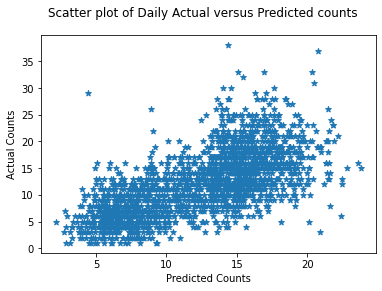

In [19]:
fig = plt.figure()
fig.suptitle('Scatter plot of Daily Actual versus Predicted counts')
plt.scatter(x=y_pred, y=y_test, marker='*')
plt.xlabel('Predicted Counts')
plt.ylabel('Actual Counts')
plt.show()